In [2]:
import pandas as pd
import numpy as np
import csv
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import os

/Users/raquelrocha/anaconda3/envs/data-mining/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/raquelrocha/anaconda3/envs/data-mining/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [3]:
sports_data_orig = pd.read_csv('XYZ_sports_dataset.csv', delimiter =";")
sports_data = sports_data_orig

In [35]:
sports_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14926 entries, 0 to 14941
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   ID                          14926 non-null  int64          
 1   Age                         14926 non-null  int64          
 2   Gender                      14926 non-null  int64          
 3   Income                      14771 non-null  float64        
 4   EnrollmentStart             14926 non-null  datetime64[ns] 
 5   EnrollmentFinish            14926 non-null  datetime64[ns] 
 6   LastPeriodStart             14926 non-null  datetime64[ns] 
 7   LastPeriodFinish            14926 non-null  datetime64[ns] 
 8   DateLastVisit               14926 non-null  datetime64[ns] 
 9   DaysWithoutFrequency        14926 non-null  timedelta64[ns]
 10  LifetimeValue               14926 non-null  float64        
 11  UseByTime                   14926 non-null  in

<h4>Change data types

In [5]:
sports_data['EnrollmentStart'] = pd.to_datetime(sports_data['EnrollmentStart'])
sports_data['EnrollmentFinish'] = pd.to_datetime(sports_data['EnrollmentFinish'])
sports_data['LastPeriodStart'] = pd.to_datetime(sports_data['LastPeriodStart'])
sports_data['LastPeriodFinish'] = pd.to_datetime(sports_data['LastPeriodFinish'])
sports_data['DateLastVisit'] = pd.to_datetime(sports_data['DateLastVisit'])

Binary encode of gender

In [6]:
sports_data.value_counts()

ID     Age  Gender  Income  EnrollmentStart  EnrollmentFinish  LastPeriodStart  LastPeriodFinish  DateLastVisit  DaysWithoutFrequency  LifetimeValue  UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  DanceActivities  TeamActivities  RacketActivities  CombatActivities  NatureActivities  SpecialActivities  OtherActivities  NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  HasReferences  NumberOfReferences  Dropout
10001  29   Female  2630.0  2014-08-12       2015-09-14        2015-01-01       2015-12-31        2015-07-16     60                    479.20         0          0.0                  0.0              0.0                0.0              0.0             0.0               0.0               0.0               1.0                0.0              23.0                 1                2.0                       17.42                       1                   2                 0.0            

In [7]:
sports_data['Gender'] = sports_data['Gender'].map({'Male': 1, 'Female': 0})

In [8]:
sports_data['Gender'].dtype

dtype('int64')

<h1> Data Exploration </h1>

In [9]:
# replace "" by nans
sports_data.replace("", np.nan, inplace=True)

# count of missing values
sports_data.isna().sum()

ID                              0
Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfRefere

<h3> Age

In [10]:
#set income as zero when the age is under 16 
sports_data.loc[(sports_data['Age'] < 16), 'Income'] = 0

In [11]:
#only consider fitness activities for customers over 16

drop_fitness_above_16 = sports_data[(sports_data['FitnessActivities'] == 1) & (sports_data['Age'] < 16)].index
sports_data.drop(drop_fitness_above_16, inplace=True)

sports_data[(sports_data['FitnessActivities'] == 1) & (sports_data['Age'] < 16)]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


In [12]:
pd.set_option('display.max_columns', None)
#Drop every child before 4 years old who is doing other activities that are not water

activities_before_4_years = (sports_data['Age'] < 4) & (
    ((sports_data['TeamActivities'] == 1) | (sports_data['SpecialActivities'] == 1) | (sports_data['CombatActivities'] == 1) |
     (sports_data['RacketActivities'] == 1) | (sports_data['AthleticsActivities'] == 1) | (sports_data['FitnessActivities'] == 1) |
     (sports_data['DanceActivities'] == 1) | (sports_data['NatureActivities'] == 1))
)

sports_data.drop(sports_data[activities_before_4_years].index, inplace=True)

In [13]:
sports_data[sports_data['EnrollmentStart'] == sports_data['EnrollmentFinish']]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
25,10025,13,0,0.0,2015-09-09,2015-09-09,2019-07-01,2019-12-31,2019-10-26,5,596.30,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,18,2.0,6.28,3,4,0.0,0,0
36,10036,13,0,0.0,2014-10-02,2014-10-02,2019-07-01,2019-12-31,2019-10-22,9,2209.97,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,199.0,166,2.0,17.14,5,5,1.0,1,0
38,10038,38,0,1910.0,2018-09-29,2018-09-29,2019-07-01,2019-12-31,2019-10-30,1,554.60,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.0,125,3.0,26.13,25,1,0.0,0,0
49,10049,56,1,6540.0,2018-09-03,2018-09-03,2019-07-01,2019-12-31,2019-10-29,2,540.10,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,0,7.0,60.97,32,1,0.0,0,0
51,10051,12,0,0.0,2018-08-17,2018-08-17,2019-07-01,2019-12-31,2019-10-28,3,852.30,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,42.0,42,4.0,34.84,4,2,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14918,24918,73,1,3870.0,2014-12-10,2014-12-10,2019-07-01,2019-12-31,2019-10-31,0,1583.90,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,472.0,0,7.0,60.97,45,5,0.0,0,0
14919,24919,1,0,0.0,2019-07-18,2019-07-18,2019-07-01,2019-12-31,2019-10-31,0,201.20,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,7,2.0,17.14,7,1,0.0,0,0
14926,24926,24,0,3290.0,2018-10-08,2018-10-08,2019-01-01,2019-12-31,2019-10-29,2,196.10,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,37,2.0,17.42,7,1,0.0,0,0
14937,24937,14,1,0.0,2016-09-08,2016-09-08,2019-07-01,2019-12-31,2019-10-29,2,1460.45,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,96,4.0,34.84,8,3,0.0,0,0


In [14]:
#all clients with enrollment start = enrollment finish are not dropouts, so let's change the enrollment finish to the retrieval date

sports_data.loc[sports_data['Dropout'] == 0, 'EnrollmentFinish'] = pd.to_datetime('2019-10-31')

sports_data[sports_data['Dropout'] == 0]['EnrollmentFinish'].value_counts()

EnrollmentFinish
2019-10-31    2970
Name: count, dtype: int64

In [15]:
#Cases in which the client is not a dropout, but the days without frequency is bigger than 0

sports_data.loc[(sports_data['DaysWithoutFrequency'] != 0) & (sports_data['Dropout'] == 0), 'DaysWithoutFrequency'] = 0

sports_data[(sports_data['DaysWithoutFrequency'] != 0) & (sports_data['Dropout'] == 0)]


,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


In [32]:
sports_data['DaysWithoutFrequency'] = sports_data['EnrollmentFinish'] - sports_data['DateLastVisit']

sports_data.drop('testedates', axis=1)

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,PercentageOfVisits,NumberOfActivities,TotalMonths,MonthlyValue,PercentageOfClasses
0,10000,60,0,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1 days,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0,31.847134,1.0,1,89.350000,0.777778
1,10001,29,0,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60 days,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1,5.740528,1.0,12,39.933333,0.043478
2,10002,23,1,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7 days,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1,19.980020,1.0,1,37.600000,0.000000
3,10003,9,1,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22 days,155.40,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1,16.930023,1.0,5,31.080000,0.100000
4,10004,35,1,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210 days,373.20,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1,0.000000,1.0,25,14.928000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14937,24937,14,1,0.0,2016-09-08,2019-10-31,2019-07-01,2019-12-31,2019-10-29,2 days,1460.45,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,96,4.0,34.84,8,3,0.0,0,0,22.962113,1.0,37,39.471622,0.857143
14938,24938,39,1,NaN,2015-09-17,2016-06-04,2016-01-01,2016-06-30,2016-04-27,38 days,343.85,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,57.0,0,7.0,60.97,3,0,0.0,0,1,4.920453,1.0,8,42.981250,0.000000
14939,24939,20,1,1810.0,2017-03-01,2017-03-31,2017-01-01,2017-06-30,2017-03-29,2 days,43.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,8,0,0.0,0,1,26.640027,1.0,1,43.600000,0.000000
14940,24940,55,1,4800.0,2018-03-01,2019-10-31,2019-07-01,2019-12-31,2019-10-28,3 days,788.60,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185.0,155,3.0,15.87,7,2,0.0,0,0,44.108381,1.0,19,41.505263,0.837838


In [18]:
#bin_edges = [0, 15, 25, 35, 45, 64, 65]  
#bin_labels = ['0-15', '15-25', '26-35', '36-45', '45-64', '65+']

# Create a new column 'age_group' with the assigned bins
#sports_data['Age'] = pd.cut(sports_data['Age'], bins=bin_edges, labels=bin_labels, right=False)

#sports_data['Age']

<h2>Feature Engineering

Real number of visits in relation to the allowed number of visits

In [19]:
sports_data['PercentageOfVisits'] = (sports_data['RealNumberOfVisits'] / sports_data['AllowedNumberOfVisitsBySLA']) * 100

Number of Activities the client is signed in

In [29]:
sports_data['NumberOfActivities'] = sports_data.iloc[:, 12:22].sum(axis=1)

In [43]:
sports_data[sports_data['NumberOfActivities'] == 0]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,testedates,PercentageOfVisits,NumberOfActivities,TotalMonths,MonthlyValue,PercentageOfClasses
333,10333,42,1,4720.0,2016-11-02,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1 days,885.80,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,63,1.0,8.71,3,3,0.0,0,0,1,34.443169,0.0,35,25.308571,0.807692
415,10415,53,0,3290.0,2017-10-07,2019-01-14,2018-07-01,2019-06-30,2018-12-14,31 days,264.50,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,5,7.0,42.00,4,1,0.0,0,1,31,9.523810,0.0,14,18.892857,0.555556
682,10682,22,0,2250.0,2014-10-08,2015-09-16,2015-01-01,2015-06-30,2015-06-04,104 days,144.45,0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0,7.0,28.98,11,1,0.0,0,1,104,37.957212,0.0,11,13.131818,0.000000
1046,11046,14,1,0.0,2015-01-29,2018-07-31,2018-01-01,2018-12-31,2018-05-28,64 days,1420.90,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,90,2.0,17.42,0,4,0.0,0,1,64,0.000000,0.0,41,34.656098,0.909091
1443,11443,42,0,5230.0,2018-03-28,2018-07-31,2018-01-01,2018-12-31,2018-07-30,1 days,93.40,0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0,7.0,60.97,18,0,0.0,0,1,1,29.522716,0.0,4,23.350000,0.000000
2964,12964,15,0,0.0,2017-06-16,2019-10-31,2019-07-01,2019-12-31,2019-03-26,219 days,861.20,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,13.0,13,2.0,17.42,0,3,0.0,0,0,219,0.000000,0.0,27,31.896296,1.000000
3735,13735,21,0,1200.0,2015-12-29,2016-03-01,2016-01-01,2016-06-30,2016-02-25,5 days,95.60,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0,7.0,59.99,25,0,0.0,0,1,5,41.673612,0.0,2,47.800000,0.000000
4085,14085,22,1,2100.0,2015-04-16,2015-09-16,2015-01-01,2015-06-30,2015-04-28,141 days,37.60,0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,7.0,28.98,2,1,0.0,0,1,141,6.901311,0.0,4,9.400000,0.000000
4619,14619,24,0,1940.0,2017-11-06,2018-05-08,2018-01-01,2018-06-30,2018-03-19,50 days,123.60,0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0,7.0,60.97,2,0,0.0,0,1,50,3.280302,0.0,5,24.720000,0.000000
5013,15013,19,1,1090.0,2016-01-06,2016-03-06,2016-01-01,2016-06-30,2016-01-20,46 days,47.60,0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0,7.0,59.99,4,0,0.0,0,1,46,6.667778,0.0,1,47.600000,0.000000


Se tiver NaN nas atividades, e zero na soma, imputar o NaN como 1

Monthly paid value

In [22]:
sports_data['TotalMonths'] = (sports_data['EnrollmentFinish'] - sports_data['EnrollmentStart']) // np.timedelta64(1, 'M')
sports_data['TotalMonths'] = np.where(sports_data['TotalMonths'] <= 0, 1, sports_data['TotalMonths']) #cases in which is less than one month, we will assume one month

sports_data['MonthlyValue'] = sports_data['LifetimeValue'] / sports_data['TotalMonths']

sports_data.drop('TotalMonths', axis=1) #drop total months column since we only needed it for this code


,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,testedates,PercentageOfVisits,NumberOfActivities,MonthlyValue
0,10000,60,0,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,0,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0,1,31.847134,1.0,89.350000
1,10001,29,0,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1,60,5.740528,1.0,39.933333
2,10002,23,1,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1,7,19.980020,1.0,37.600000
3,10003,9,1,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1,22,16.930023,1.0,31.080000
4,10004,35,1,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1,210,0.000000,1.0,14.928000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14937,24937,14,1,0.0,2016-09-08,2019-10-31,2019-07-01,2019-12-31,2019-10-29,0,1460.45,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,96,4.0,34.84,8,3,0.0,0,0,2,22.962113,1.0,39.471622
14938,24938,39,1,NaN,2015-09-17,2016-06-04,2016-01-01,2016-06-30,2016-04-27,38,343.85,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,57.0,0,7.0,60.97,3,0,0.0,0,1,38,4.920453,1.0,42.981250
14939,24939,20,1,1810.0,2017-03-01,2017-03-31,2017-01-01,2017-06-30,2017-03-29,2,43.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,8,0,0.0,0,1,2,26.640027,1.0,43.600000
14940,24940,55,1,4800.0,2018-03-01,2019-10-31,2019-07-01,2019-12-31,2019-10-28,0,788.60,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185.0,155,3.0,15.87,7,2,0.0,0,0,3,44.108381,1.0,41.505263


Percentage of visits that were classes

In [44]:
sports_data['PercentageOfClasses'] = sports_data['AttendedClasses'] / sports_data['NumberOfFrequencies'] * 100

In [24]:
sports_data.loc[(sports_data['HasReferences'] == 1) & (sports_data['NumberOfReferences'] == 0), 'HasReferences'] = 0

crianças também podem ter special e  other activities.

In [42]:
sports_data[sports_data['Age'] < 3]['OtherActivities'].value_counts()

OtherActivities
0.0    379
Name: count, dtype: int64

<h2> Correlation Matrix </h2>

FileNotFoundError: [Errno 2] No such file or directory: '../figures/exp_analysis/correlation_matrix.png'

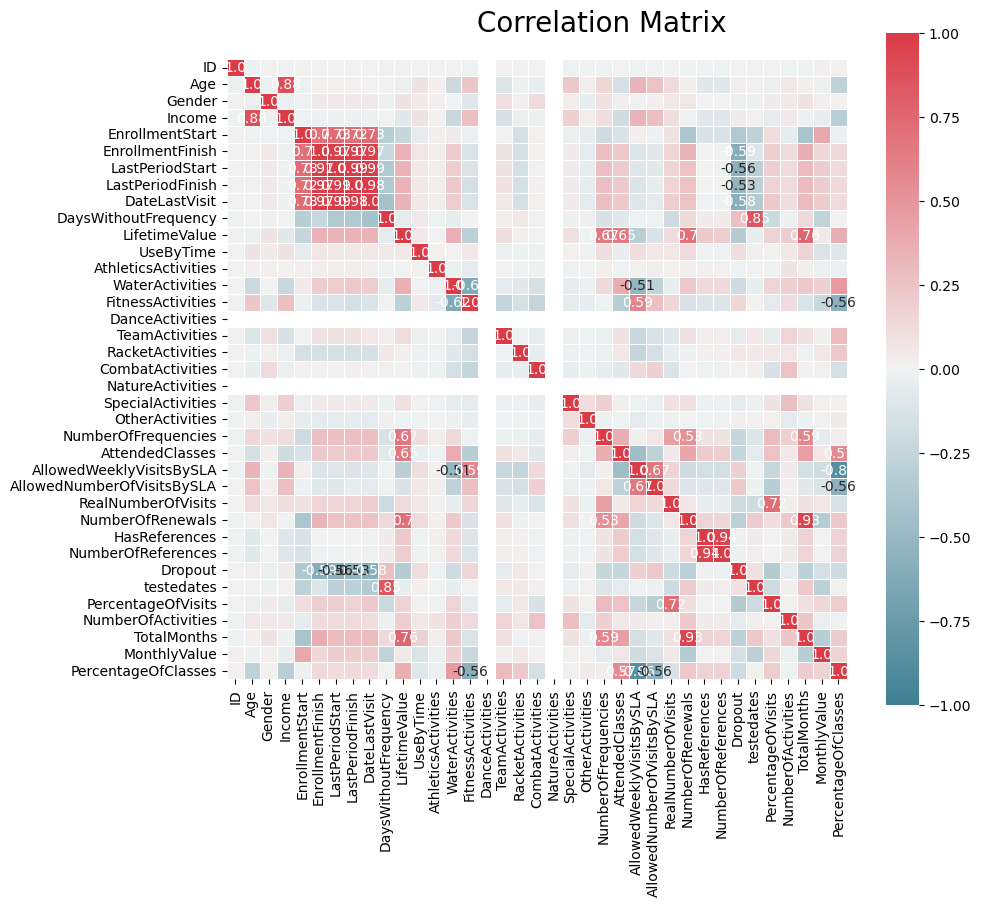

In [25]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(sports_data.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'correlation_matrix.png'), dpi=200)

plt.show()

-Missing values, se tiver zero em tudo, fica NaN a 1
-Missing values das categoricas binarias, treinar o modelo que preve